<a href="https://colab.research.google.com/github/hanyoseob/lecture_optimization/blob/main/chapter10_Conjugate_gradient_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
---
In mathematics, ___the conjugate gradient method___ is an algorithm for the numerical solution of particular systems of linear equations, namely those whose matrix is [positive-definite](https://en.wikipedia.org/wiki/Definite_matrix#Negative-definite.2C_semidefinite_and_indefinite_matrices). The conjugate gradient method is often implemented as an iterative algorithm, applicable to sparse systems that are too large to be handled by a direct implementation or other direct methods such as the Cholesky decomposition. Large sparse systems often arise when numerically solving partial differential equations or optimization problems.

>![conjugate gradient method](https://upload.wikimedia.org/wikipedia/commons/b/bf/Conjugate_gradient_illustration.svg "")
>
>__[FIGURE] A comparison of the convergence of [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) with optimal step size (in green) and [conjugate vector](https://en.wikipedia.org/wiki/Conjugate_gradient_method) (in red) for minimizing a quadratic function associated with a given linear system. Conjugate gradient, assuming exact arithmetic, converges in at most n steps, where n is the size of the matrix of the system (here n = 2).__

__Before following an implementation below, PLEASE REVIEW [MATHMETICAL DSCRIPTION](https://en.wikipedia.org/wiki/Conjugate_gradient_method) since the more details are described [HERE](https://en.wikipedia.org/wiki/Conjugate_gradient_method).__


## Description of the problem addressed by conjugate gradients
---
Suppose we want to solve the system of linear equations
> $Ax=b$,

for the vector $x$, where the known $n \times n$ matrix $A$ is symmetric (i.e., $A^T = A$), positive-definite (i.e., $x^TAx > 0$ for all non-zero vectors $x \in \mathbb{R}^n$), and real, and $b$ is known as well. We denote the unique solution of this system by $x^*$.

## General solution
---
> $r_0 := b - Ax_0$
>
> if $r_0$ is sufficiently small, then return $x_0$ as the result
>
> $p_0 := r_0$
> 
> k := 0
> 
> repeat
>
>> $a_k := \frac{r_k^Tr_k}{p_k^TAp_k}$
>> 
>> $x_{k+1} := x_k + \alpha_kp_k$
>>
>> $r_{k+1} := r_k - \alpha_kAp_k$
>>
>> if $r_{k+1}$ is sufficiently small, then exit loop
>>
>> $\beta_k := \frac{r_{k+1}^Tr_{k+1}}{r_k^Tr_k}$
>>
>> $p_{k+1} := r_{k+1} + \beta_k p_k$
>>
>> k := k + 1
>
> end repeat
>
> return $x_{k+1}$ as the result

___THIS IS THE MOST COMMONLY USED ALGORITHM.___


# Implementation
---

1. Problem definition
2. Implement the gradient descent method

## Example 1: 
$Ax = 
\begin{bmatrix}
  4 & 1\\ 
  1 & 3
\end{bmatrix} 
\begin{bmatrix}
  x_1\\ 
  x_2
\end{bmatrix}
=
\begin{bmatrix}
  1\\ 
  2
\end{bmatrix}$

### Step 1. Problem definition
Consider the linear system $Ax = y$ given by
> $Ax = 
\begin{bmatrix}
  4 & 1\\ 
  1 & 3
\end{bmatrix} 
\begin{bmatrix}
  x_1\\ 
  x_2
\end{bmatrix}
=
\begin{bmatrix}
  1\\ 
  2
\end{bmatrix}$


### Step 2. Conjugate gradient method

1. Add packages
2. Set the problem
3. Run the pseudo inversion $A^{-1}$
4. Run the conjugate graident method
5. Comparison the results

#### Add packages

In [1]:
# Mathmetical packages
import numpy as np

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 15}

matplotlib.rc('font', **font)


#### Set the problem

In [2]:
# A: Symmetric positive-definite matrix in (2, 2)
A = np.asarray([[4, 1], [1, 3]])

# x: Ground truth in (2)
x_gt = np.asarray([1/11, 7/11]).T

# b: output in (2)
b = np.matmul(A, x_gt)


##### How to check whether the matrix $A$ is positive-definite matrix or not
If all the eigen values are positive, the matrix $A$ is a positive-definite matrix

In [3]:
# Apply the singular vector decomposition (SVD) to matrix A
_, s, _ = np.linalg.svd(A)

print('The eigen values of matrix A:')
print(s)
print(' ')
print('Its positivity:')
print(s > 0)

print(' ')
print('The matrix A is:')
if np.sum( 1.0 * (s > 0) ) == len(s):
  print('positive-definite.')
else:
  print('not positive-definite.')

The eigen values of matrix A:
[4.61803399 2.38196601]
 
Its positivity:
[ True  True]
 
The matrix A is:
positive-definite.


#### Run the pseudo inversion $A^{-1}$

In [4]:
# A^-1: Inverse system matrix in (N, K)
AINV = np.linalg.pinv(A)

# Pseudo inversion
x = np.matmul(AINV, b)

# Print the results
x_est_pinv = x

print('Ground truth \t\tResult from PINV')
print('----------------------------------------------')
print('[%+.6f, %+.6f] \t[%+.6f, %+.6f]' % (x_gt[0], x_gt[1], x_est_pinv[0], x_est_pinv[1]))

Ground truth 		Result from PINV
----------------------------------------------
[+0.090909, +0.636364] 	[+0.090909, +0.636364]


#### Run the conjugate graident method

In [5]:
# Hyper parameters for the Newton's method
max_iter = 10

x = np.zeros_like(x_gt)
x_iter = []
x_iter.append(x)

# Search the solution using the conjugate gradient method
r = b - np.matmul(A, x)
p = r
rs_old = np.matmul(r.T, r)

for i in range(1, max_iter + 1):
  Ap = np.matmul(A, p)

  alpha = rs_old / np.matmul(p.T, Ap)
  
  x = x + alpha * p
  r = r - alpha * Ap

  rs_new = np.matmul(r.T, r)

  if np.sqrt(rs_new) < 1e-10:
    x_iter.append(x)
    break

  p = r + (rs_new / rs_old) * p
  rs_old = rs_new

  x_iter.append(x)

# Print the solution traces
x_est_cg = x_iter[-1]

print(' ')
print('The sequence given by the conjugate gradient method is:')
print('# of iter')
print('--------------------------------------')
for (i, x) in enumerate(x_iter):
  x = x_iter[i]
  print('x_%03d \t\t[%+.6f, %+.6f]' % (i, x[0], x[1]))

print('--------------------------------------')
print('x* \t\t[%+.6f, %+.6f]' % (x_est_cg[0], x_est_cg[1]))


 
The sequence given by the conjugate gradient method is:
# of iter
--------------------------------------
x_000 		[+0.000000, +0.000000]
x_001 		[+0.250000, +0.500000]
x_002 		[+0.090909, +0.636364]
--------------------------------------
x* 		[+0.090909, +0.636364]


#### Comparision the results

In [6]:
# Print the results from Pseudo inversion and conjugate gradient method
print(' ')
print('Ground truth \t\tResult from PINV \tResult from CG')
print('----------------------------------------------------------------------')
print('[%+.6f, %+.6f] \t[%+.6f, %+.6f] \t[%+.6f, %+.6f]' % 
      (x_gt[0], x_gt[1], x_est_pinv[0], x_est_pinv[1], x_est_cg[0], x_est_cg[1]))

 
Ground truth 		Result from PINV 	Result from CG
----------------------------------------------------------------------
[+0.090909, +0.636364] 	[+0.090909, +0.636364] 	[+0.090909, +0.636364]


## Example 2: $Ax = b$

### Step 1. Problem definition
Consider the linear system $Ax = y$ given by
> $Ax = b$, 
>
> where $A \in \mathbb{R}^{N \times N}$, $x \in \mathbb{R}^{N \times 1}$, and $b \in \mathbb{R}^{N \times 1}$.


### Step 2. Conjugate gradient method

1. Add packages
2. Set the problem
3. Run the pseudo inversion $A^{-1}$
4. Run the conjugate graident method
5. Comparison the results

#### Add packages

In [7]:
# Mathmetical packages
import numpy as np

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 15}

matplotlib.rc('font', **font)


#### Set the problem
To apply the conjugate gradient method for solving linear equations, the matrix $A$ must be __positive-definite__. Easy way to satisfying the positive-definite is that the matrix $A$ is composed as a product $A = B^TB$.

In [8]:
# the dimension of matrix
N = 50

# A: Symmetric positive-definite matrix in (N, N)
B = np.random.randn(N, N)
A = np.matmul(B.T, B)

_, s, _ = np.linalg.svd(A)

# x: Ground truth in (N, 1)
x_gt = np.random.randn(N, 1)

# b: output in (N, 1)
b = np.matmul(A, x_gt)


##### How to check whether the matrix $A$ is positive-definite matrix or not
If all the eigen values are positive, the matrix $A$ is a positive-definite matrix

In [9]:
# Apply the singular vector decomposition (SVD) to matrix A
_, s, _ = np.linalg.svd(A)

print('The eigen values of matrix A:')
print(s)
print(' ')
print('Its positivity:')
print(s > 0)

print(' ')
print('The matrix A is:')
if np.sum( 1.0 * (s > 0) ) == len(s):
  print('positive-definite.')
else:
  print('not positive-definite.')

The eigen values of matrix A:
[1.87056787e+02 1.70362274e+02 1.61010147e+02 1.46597127e+02
 1.33791050e+02 1.24214051e+02 1.18113028e+02 1.09507099e+02
 1.03384645e+02 1.02134736e+02 9.52661600e+01 8.98341404e+01
 8.36317933e+01 7.55960145e+01 7.31675474e+01 6.86552747e+01
 6.43603972e+01 5.94460347e+01 5.43681841e+01 4.89872935e+01
 4.72606764e+01 4.32456710e+01 4.16383591e+01 3.68519820e+01
 3.40702615e+01 2.67811814e+01 2.31428040e+01 2.15772937e+01
 2.02494271e+01 1.80904841e+01 1.68099327e+01 1.56511645e+01
 1.28495493e+01 1.18866469e+01 1.03366786e+01 7.58335924e+00
 7.00903512e+00 5.47841571e+00 5.14829714e+00 4.67862204e+00
 4.12666008e+00 3.02951727e+00 2.41178468e+00 1.57076969e+00
 1.21714564e+00 9.66315625e-01 4.68372265e-01 3.00364081e-01
 1.44738419e-01 4.05249463e-03]
 
Its positivity:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True

#### Run the pseudo inversion $A^{-1}$

Text(0.5, 1.0, 'Results from Pseudo inversion $x^*$')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


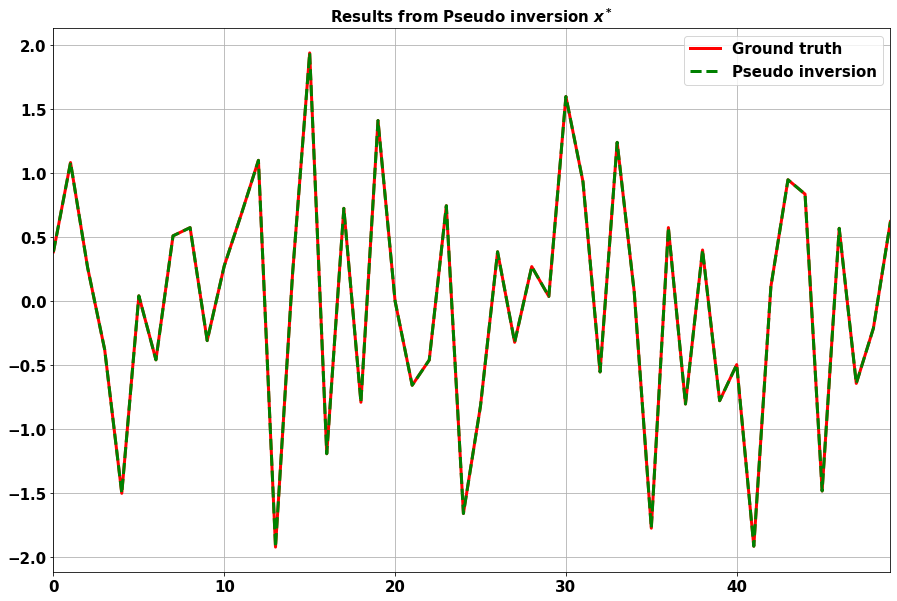

In [10]:
# A^-1: Inverse system matrix in (N, K)
AINV = np.linalg.pinv(A)

# Pseudo inversion
x = np.matmul(AINV, b)

# Plot the results from Pseudo inversion
x_est_pinv = x

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

ax.plot(x_gt, 'r-', label='Ground truth', linewidth=3)
ax.plot(x_est_pinv, 'g--', label='Pseudo inversion', linewidth=3)
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlim((0, N-1))
ax.set_title('Results from Pseudo inversion $x^*$', fontsize=15, fontweight='bold')


#### Run the conjugate graident method

Text(0.5, 1.0, 'Results from Pseudo inversion $x^*$')

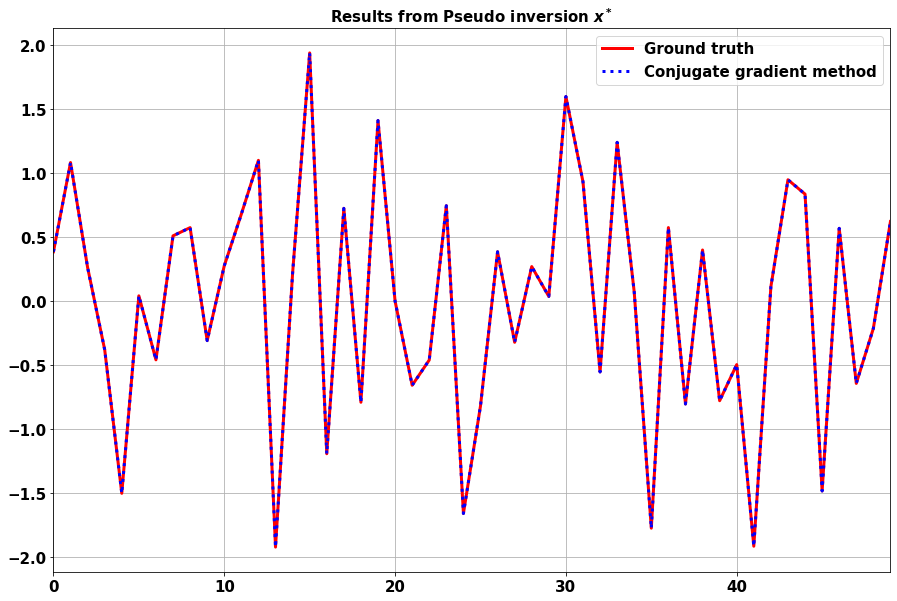

In [11]:
# Hyper parameters for the Newton's method
max_iter = 100

x = np.zeros_like(x_gt)
x_iter = []
x_iter.append(x)

# Search the solution using the conjugate gradient method
r = b - np.matmul(A, x)
p = r
rs_old = np.matmul(r.T, r)

for i in range(1, max_iter + 1):
  Ap = np.matmul(A, p)

  alpha = rs_old / np.matmul(p.T, Ap)
  
  x = x + alpha * p
  r = r - alpha * Ap

  rs_new = np.matmul(r.T, r)

  if np.sqrt(rs_new) < 1e-10:
    x_iter.append(x)
    break

  p = r + (rs_new / rs_old) * p
  rs_old = rs_new

  x_iter.append(x)

# Plot the results from Conjugate gradient method
x_est_cg = x_iter[-1]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

plt.plot(x_gt, 'r-', label='Ground truth', linewidth=3)
plt.plot(x_est_cg, 'b:', label='Conjugate gradient method', linewidth=3)
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlim((0, N-1))
ax.set_title('Results from Pseudo inversion $x^*$', fontsize=15, fontweight='bold')


#### Comparison the results

Text(0.5, 1.0, 'Results from Pseudo inversion (Green) and Conjugate gradient method (Blue)')

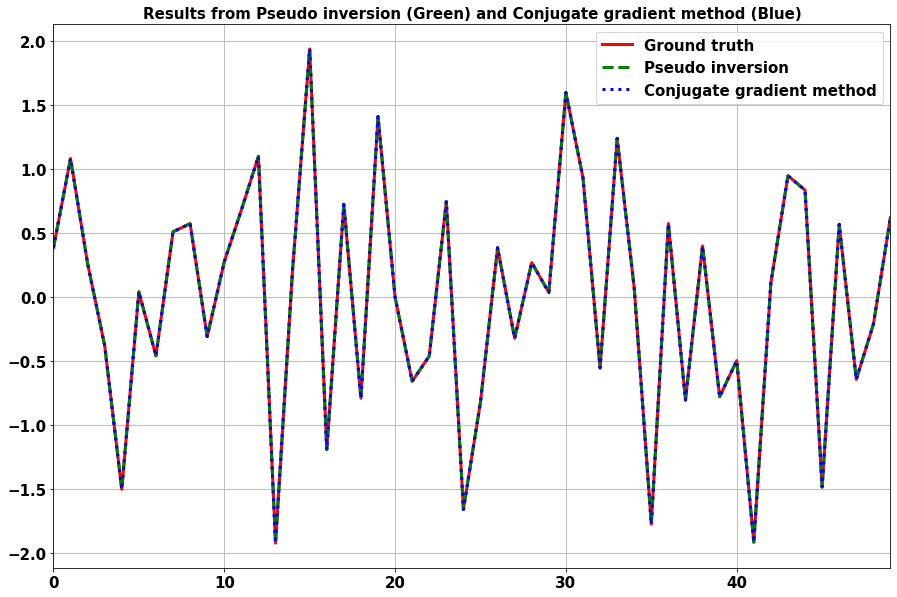

In [12]:
# Plot the results from Pseudo inversion and conjugate gradient method
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

plt.plot(x_gt, 'r-', label='Ground truth', linewidth=3)
ax.plot(x_est_pinv, 'g--', label='Pseudo inversion', linewidth=3)
plt.plot(x_est_cg, 'b:', label='Conjugate gradient method', linewidth=3)
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlim((0, N-1))
ax.set_title('Results from Pseudo inversion (Green) and Conjugate gradient method (Blue)', fontsize=15, fontweight='bold')


# Conclusion
The [conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method) can be used to solve unconstrained optimization problems such as energy minimization.
Specifically, to apply the conjugate gradient method for solving linear equations, the matrix $A$ must be __positive-definite__. Easy way to satisfying the positive-definite is that the matrix $A$ is composed as a product $A = B^TB$.

When we address the optimization problem defined as:
> $F(x) = \frac{1}{2} || Ax - y ||_2^2$,

its derivative $\nabla F(x)$ is represented by:
> $\nabla F(x) = A^T(Ax - y)$.

The optimal solution $x^*$ is defined when the derivative equals to zeros like:
> $\nabla F(x) = A^T(Ax - y)$
>
> $~~~~~~~~~~~= 0$.

Therefore, above equation can be reformulated as:
> $A^TAx = A^Ty$.

Since $A^TA$ is __positive-definite matrix__, the optimization problem can be solved using the [conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method).

#References
---

1. [Conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
2. [Positive-definite](https://en.wikipedia.org/wiki/Definite_matrix#Negative-definite.2C_semidefinite_and_indefinite_matrices)


# Next
---

Next chapter, we will implement the [Conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method) to solve a 2D optimization problems.